In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
def is_transition_metal(at):
    n = at.GetAtomicNum()
    return (n>=22 and n<=29) or (n>=40 and n<=47) or (n>=72 and n<=79)
def set_dative_bonds(mol, fromAtoms=(7,8)):
    """ convert some bonds to dative

    Replaces some single bonds between metals and atoms with atomic numbers in fomAtoms
    with dative bonds. The replacement is only done if the atom has "too many" bonds.

    Returns the modified molecule.

    """
    pt = Chem.GetPeriodicTable()
    rwmol = Chem.RWMol(mol)
    rwmol.UpdatePropertyCache(strict=False)
    metals = [at for at in rwmol.GetAtoms() if is_transition_metal(at)]
    for metal in metals:
        for nbr in metal.GetNeighbors():
            if nbr.GetAtomicNum() in fromAtoms and \
               nbr.GetExplicitValence()>pt.GetDefaultValence(nbr.GetAtomicNum()) and \
               rwmol.GetBondBetweenAtoms(nbr.GetIdx(),metal.GetIdx()).GetBondType() == Chem.BondType.SINGLE:
                rwmol.RemoveBond(nbr.GetIdx(),metal.GetIdx())
                rwmol.AddBond(nbr.GetIdx(),metal.GetIdx(),Chem.BondType.DATIVE)
    return rwmol

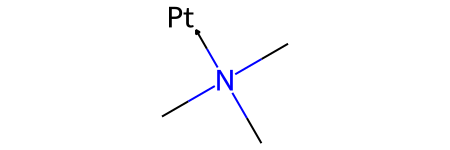

In [4]:
m = Chem.MolFromSmiles('CN(C)(C)[Pt]', sanitize=False)
m2 = set_dative_bonds(m)
m2

In [6]:
# we can check the bond between nitrogen and platinum
print("ikatanya adalah :", m2.GetBondBetweenAtoms(1,4).GetBondType())

ikatanya adalah : DATIVE
